# Parallel Coordinate Plot: Usage Example

- Generate a static image of Parallel coordinate plot using PMP.
- Author: Jiwoo Lee
- History
  - (2021-07) First release
  - (2024-03) Updated

## 1. Generate a dummy data

In [1]:
import numpy as np

# create some dummy data
N1, N2, N3 = 10, 5, 8
N = N1 + N2 + N3
category = np.concatenate([np.full(N1, 1), np.full(N2, 2), np.full(N3, 3)])
y1 = np.random.uniform(0, 10, N) + 7 * category
y2 = np.sin(np.random.uniform(0, np.pi, N)) ** category
y3 = np.random.binomial(300, 1 - category / 10, N)
y4 = np.random.binomial(200, (category / 6) ** 1/3, N)
y5 = np.random.uniform(0, 800, N)
y6 = np.random.uniform(0, 500, N)

# organize the data
data = np.dstack([y1, y2, y3, y4, y5, y6])[0]  # 2-D numpy array
metric_names = ['Metric 1', 'Metric 2', 'Metric 3', 'Metric 4', 'Metric 5', 'Metric 6']  # metric list (x-axis)
model_names = ['Model '+str(n) for n in range(data.shape[0])]  # models 

In [2]:
print('data.shape: ', data.shape)
print('metric_names: ', metric_names)
print('model_names: ', model_names)

data.shape:  (23, 6)
metric_names:  ['Metric 1', 'Metric 2', 'Metric 3', 'Metric 4', 'Metric 5', 'Metric 6']
model_names:  ['Model 0', 'Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8', 'Model 9', 'Model 10', 'Model 11', 'Model 12', 'Model 13', 'Model 14', 'Model 15', 'Model 16', 'Model 17', 'Model 18', 'Model 19', 'Model 20', 'Model 21', 'Model 22']


## 2. Plot

In [3]:
from pcmdi_metrics.graphics import parallel_coordinate_plot

Parameters
----------
- `data`: 2-d numpy array for metrics
- `metric_names`: list, names of metrics for individual vertical axes (axis=1)
- `model_names`: list, name of models for markers/lines (axis=0)
- `models_to_highlight`: list, default=None, List of models to highlight as lines or marker
- `models_to_highlight_by_line`: bool, default=True, highlight as lines. If False, as marker
- `models_to_highlight_colors`: list, default=None, List of colors for models to highlight as lines
- `models_to_highlight_labels`: list, default=None, List of string labels for models to highlight as lines
- `models_to_highlight_markers`: list, matplotlib markers for models to highlight if as marker
- `models_to_highlight_markers_size`: float, size of matplotlib markers for models to highlight if as marker
- `fig`: `matplotlib.figure` instance to which the parallel coordinate plot is plotted.
            If not provided, use current axes or create a new one.  Optional.
- `ax`: `matplotlib.axes.Axes` instance to which the parallel coordinate plot is plotted.
        If not provided, use current axes or create a new one.  Optional.
- `figsize`: tuple (two numbers), default=(15,5), image size
- `show_boxplot`: bool, default=False, show box and wiskers plot
- `show_violin`: bool, default=False, show violin plot
- `violin_colors`: tuple or list containing two strings for colors of violin. Default=("lightgrey", "pink")
- `violin_label`: string to label the violin plot, when violin plot is not splited. Default is None.
- `title`: string, default=None, plot title
- `identify_all_models`: bool, default=True. Show and identify all models using markers
- `xtick_labelsize`: number, fontsize for x-axis tick labels (optional)
- `ytick_labelsize`: number, fontsize for x-axis tick labels (optional)
- `colormap`: string, default='viridis', matplotlib colormap
- `num_color`: integer, default=20, how many color to use.
- `legend_off`: bool, default=False, turn off legend
- `legend_ncol`: integer, default=6, number of columns for legend text
- `legend_bbox_to_anchor`: tuple, defulat=(0.5, -0.14), set legend box location
- `legend_loc`: string, default="upper center", set legend box location
- `legend_fontsize`: float, default=8, legend font size
- `logo_rect`: sequence of float. The dimensions [left, bottom, width, height] of the new Axes.
                All quantities are in fractions of figure width and height.  Optional.
- `logo_off`: bool, default=False, turn off PMP logo
- `model_names2`: list of string, should be a subset of `model_names`.  If given, violin plot will be split into 2 groups. Optional.
- `group1_name`: string, needed for violin plot legend if splited to two groups, for the 1st group. Default is 'group1'.
- `group2_name`: string, needed for violin plot legend if splited to two groups, for the 2nd group. Default is 'group2'.
- `comparing_models`: tuple or list containing two strings for models to compare with colors filled between the two lines.
- `fill_between_lines`: bool, default=False, fill color between lines for models in comparing_models
- `fill_between_lines_colors`: tuple or list containing two strings of colors for filled between the two lines. Default=('red', 'green')
- `arrow_between_lines`: bool, default=False, place arrows between two lines for models in comparing_models
- `arrow_between_lines_colors`: tuple or list containing two strings of colors for arrow between the two lines. Default=('red', 'green')
- `arrow_alpha`: float, default=1, transparency of arrow (faction between 0 to 1)
- `vertical_center`: string ("median", "mean")/float/integer, default=None, adjust range of vertical axis to set center of vertical axis as median, mean, or given number
- `vertical_center_line`: bool, default=False, show median as line
- `vertical_center_line_label`: str, default=None, label in legend for the horizontal vertical center line. If not given, it will be automatically assigned. It can be turned off by "off"
- `ymax`: int or float, default=None, specify value of vertical axis top
- `ymin`: int or float, default=None, specify value of vertical axis bottom

Return
------
- `fig`: matplotlib component for figure
- `ax`: matplotlib component for axis

## 3. Usage example

- Default plot

(<Figure size 1500x500 with 7 Axes>,
 <Axes: title={'center': 'Metric Collection A'}>)

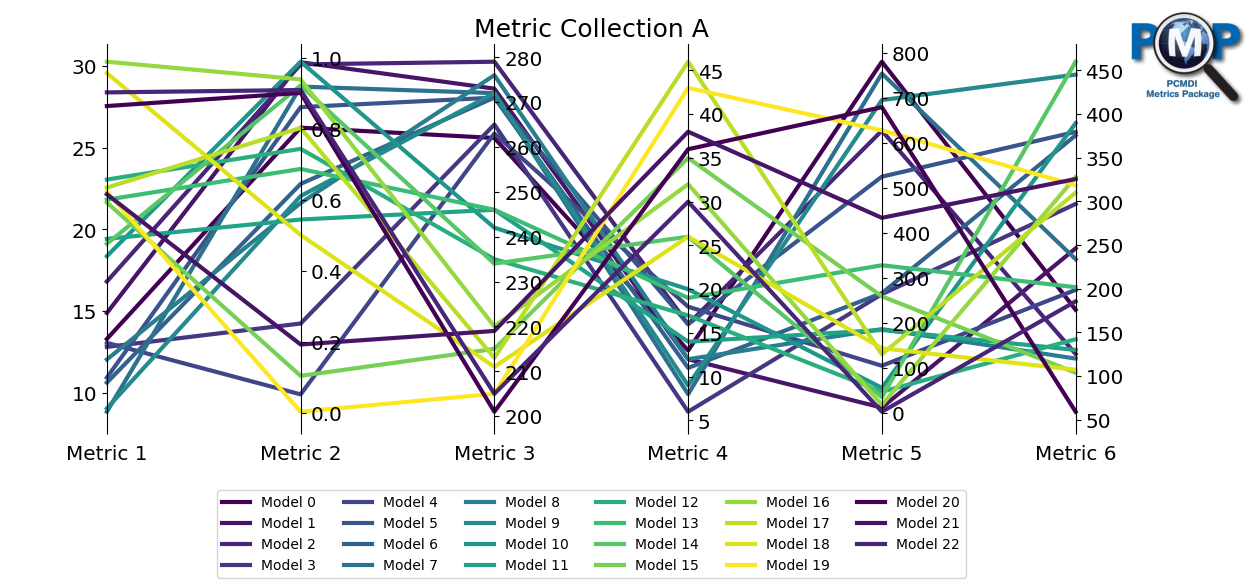

In [4]:
parallel_coordinate_plot(data, metric_names, model_names, models_to_highlight=model_names, title='Metric Collection A')

(<Figure size 1500x500 with 7 Axes>,
 <Axes: title={'center': 'Metric Collection A'}>)

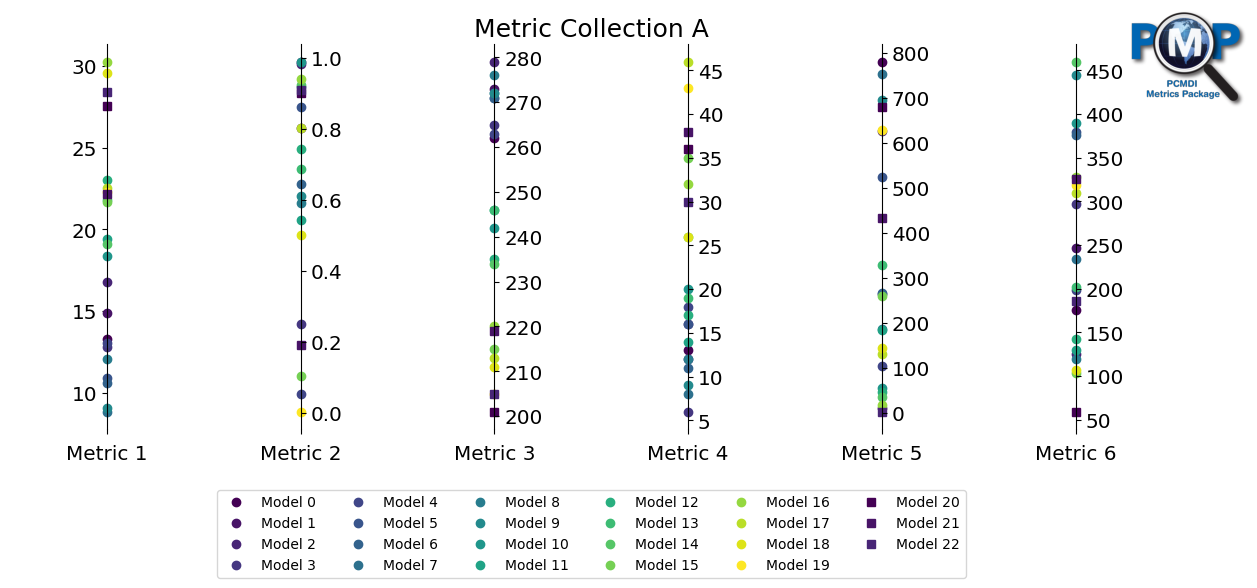

In [5]:
parallel_coordinate_plot(data, metric_names, model_names, title='Metric Collection A')

(<Figure size 1500x500 with 7 Axes>,
 <Axes: title={'center': 'Metric Collection A'}>)

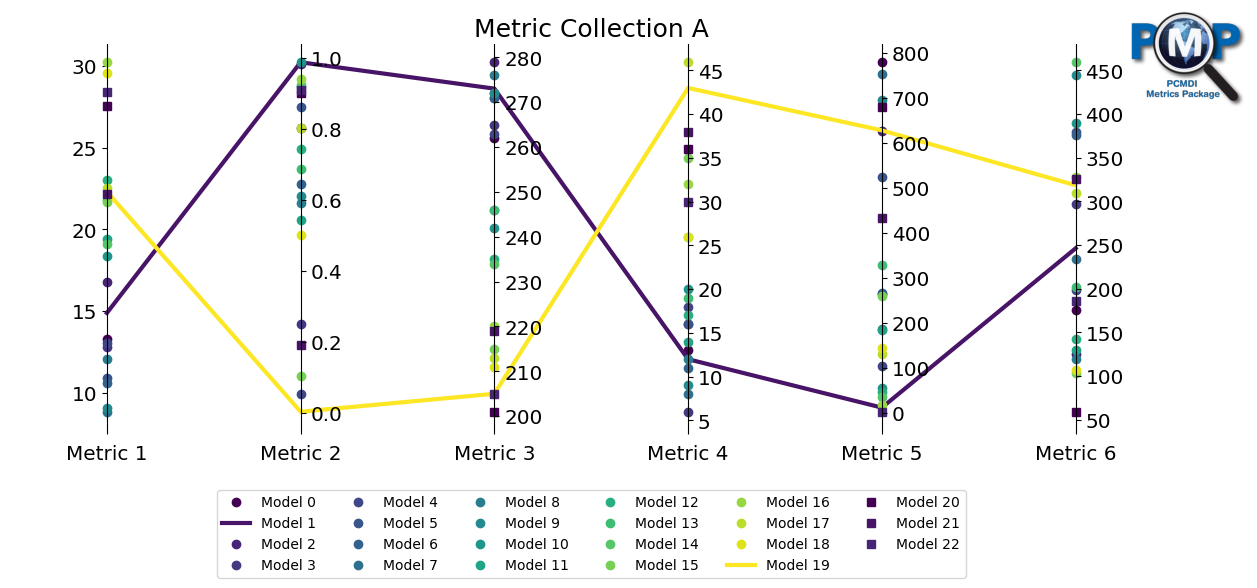

In [6]:
models_to_highlight = ['Model 1', 'Model 19']  # models to highlight by lines
parallel_coordinate_plot(data, metric_names, model_names, models_to_highlight, title='Metric Collection A')

- Hide other models as individuals but show their population distribution only by `identify_all_models=False`

(<Figure size 1500x500 with 7 Axes>,
 <Axes: title={'center': 'Metric Collection A'}>)

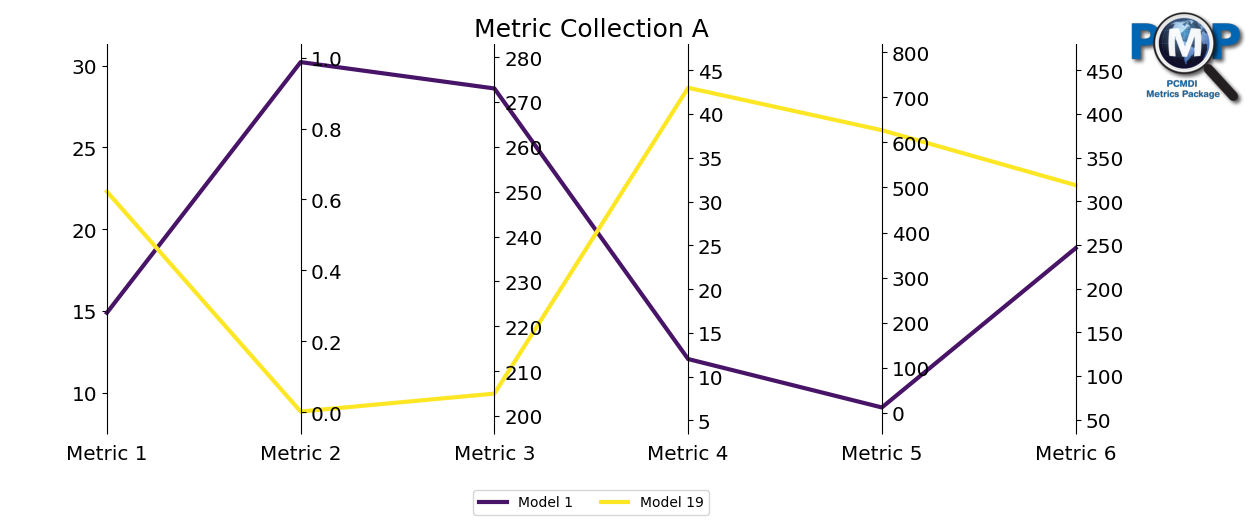

In [7]:
parallel_coordinate_plot(data, metric_names, model_names, models_to_highlight, title='Metric Collection A', 
                         identify_all_models=False)

- Turn on box plot by `show_boxplot=True`

(<Figure size 1500x500 with 7 Axes>,
 <Axes: title={'center': 'Metric Collection A'}>)

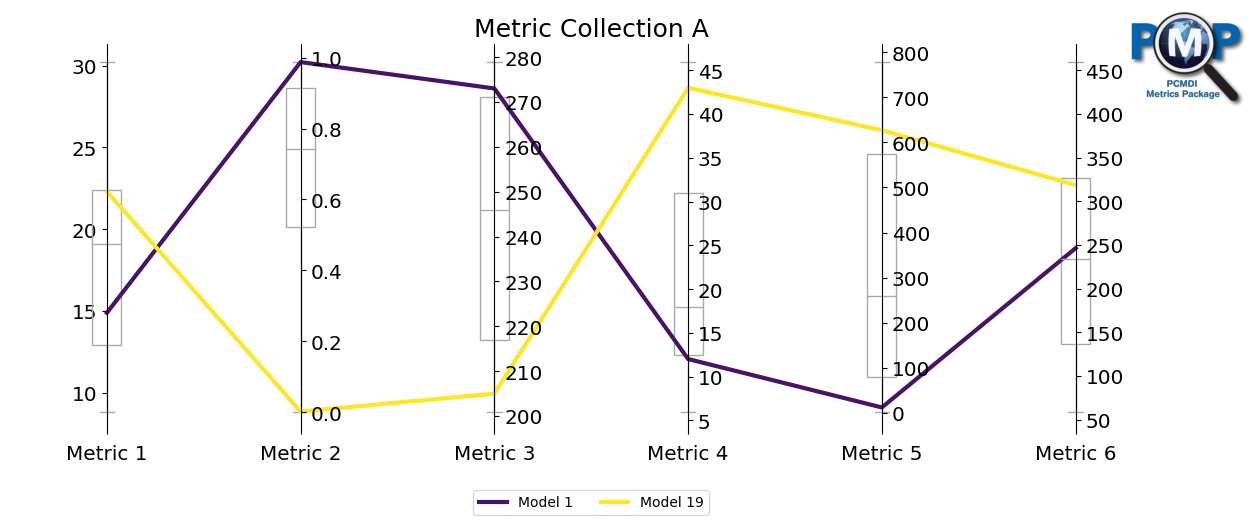

In [8]:
parallel_coordinate_plot(data, metric_names, model_names, models_to_highlight, title='Metric Collection A', 
                         show_boxplot=True, identify_all_models=False)

- Turn on violin plot by `show_violin=True`

(<Figure size 1500x500 with 7 Axes>,
 <Axes: title={'center': 'Metric Collection A'}>)

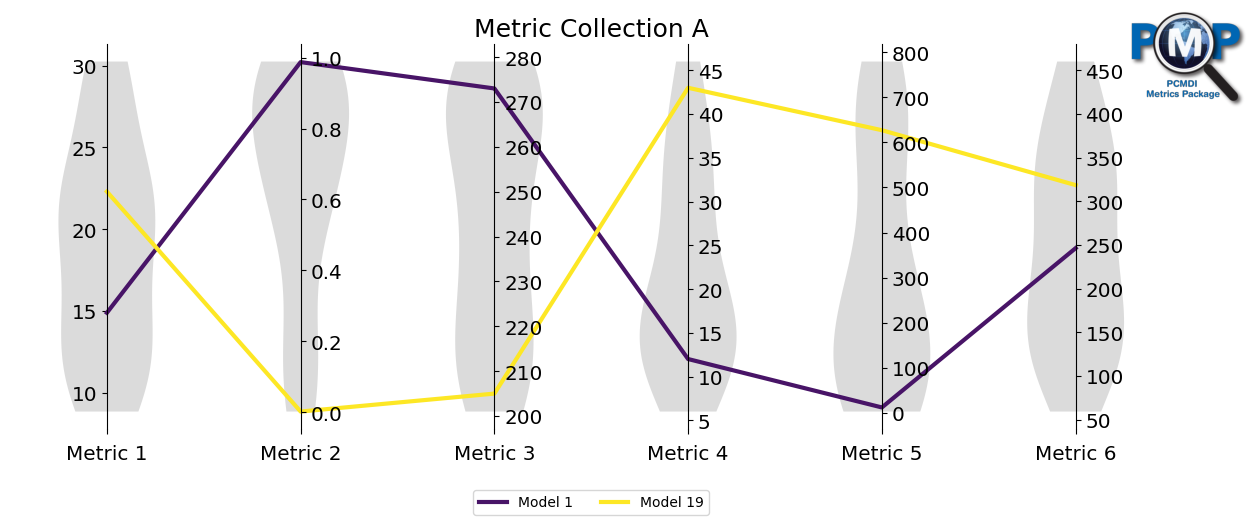

In [9]:
parallel_coordinate_plot(data, metric_names, model_names, models_to_highlight, title='Metric Collection A',
                         show_violin=True, identify_all_models=False)

- Turn on both box and violin plots by `show_boxplot=True` and `show_violin=True`

(<Figure size 1500x500 with 7 Axes>,
 <Axes: title={'center': 'Metric Collection A'}>)

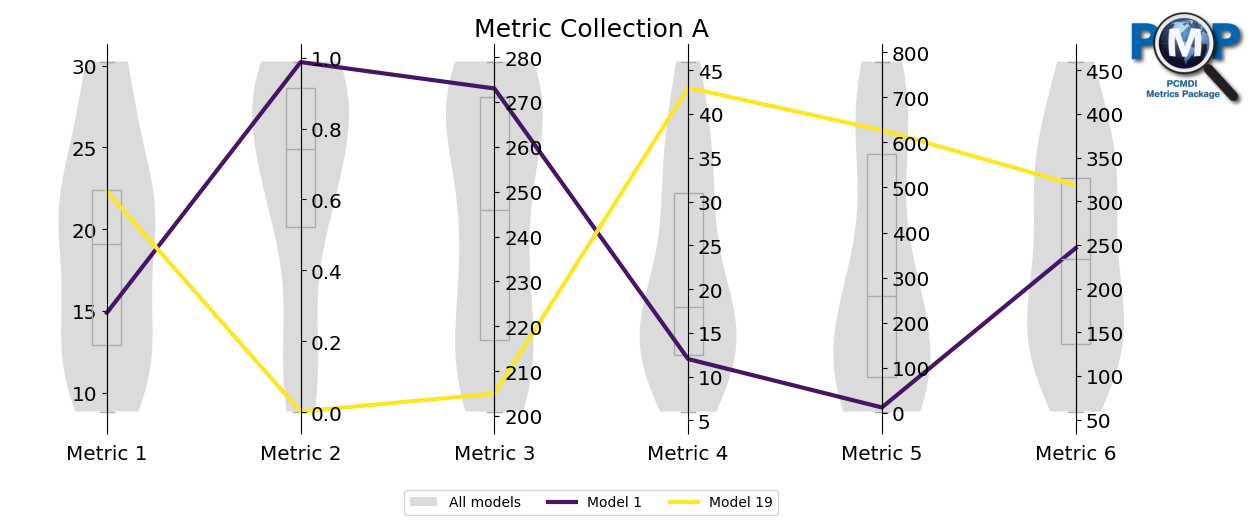

In [10]:
parallel_coordinate_plot(data, metric_names, model_names, models_to_highlight, title='Metric Collection A',
                         show_boxplot=True, show_violin=True, violin_label="All models", identify_all_models=False)

- Apply different [colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

(<Figure size 1500x500 with 7 Axes>,
 <Axes: title={'center': 'Metric Collection A'}>)

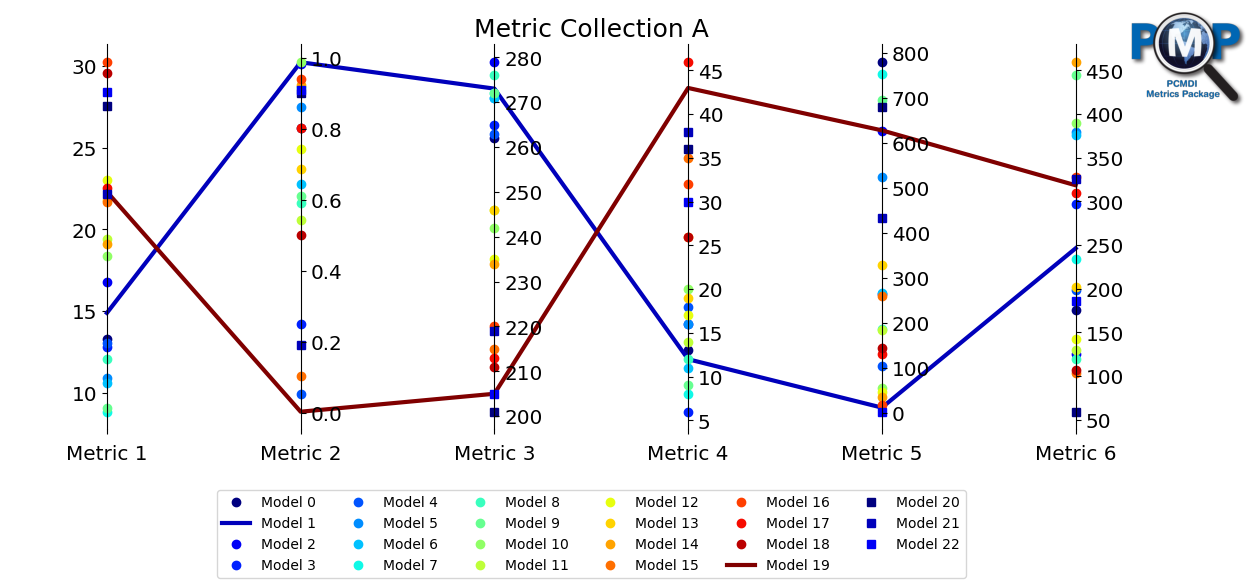

In [11]:
parallel_coordinate_plot(data, metric_names, model_names, models_to_highlight, title='Metric Collection A',
                         colormap='jet')

### Multi-panel plot
- You can make also a multi-panel plot

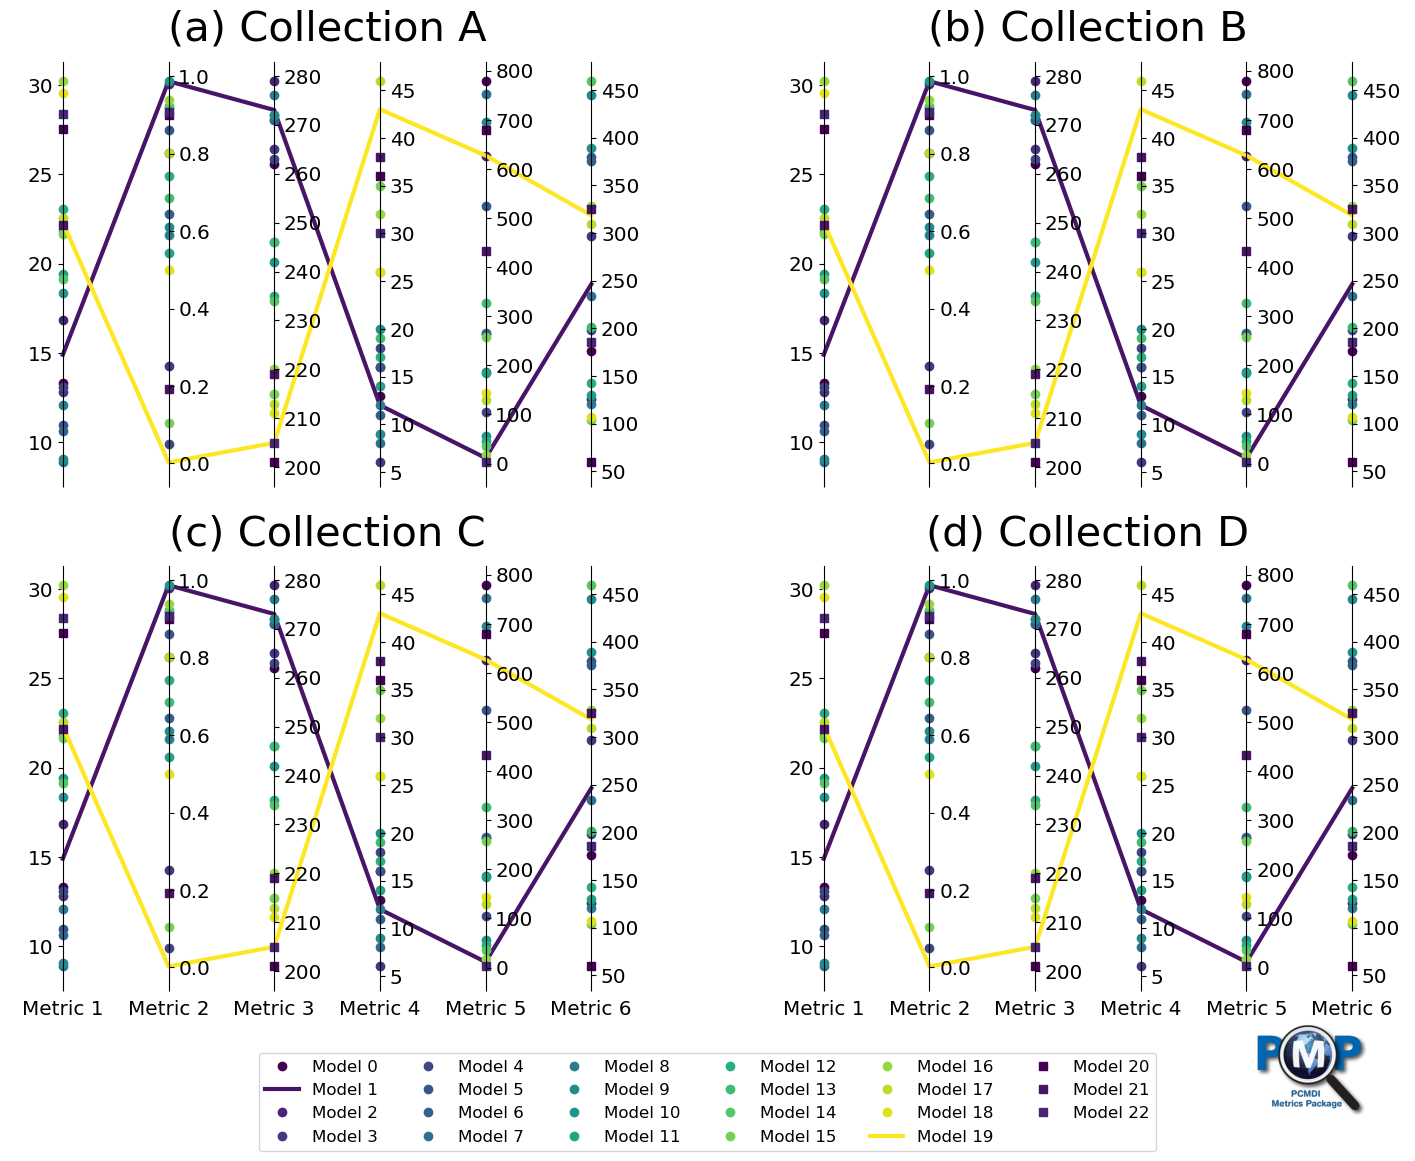

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

parallel_coordinate_plot(data, metric_names, model_names, models_to_highlight, 
                         fig=fig, ax=ax[0,0], legend_off=True, logo_off=True)
ax[0,0].set_title('(a) Collection A', fontsize=30, pad=15)
ax[0,0].set_xticklabels([])

parallel_coordinate_plot(data, metric_names, model_names, models_to_highlight, 
                         fig=fig, ax=ax[0,1], legend_off=True, logo_off=True)
ax[0,1].set_title('(b) Collection B', fontsize=30, pad=15)
ax[0,1].set_xticklabels([])

parallel_coordinate_plot(data, metric_names, model_names, models_to_highlight, 
                         fig=fig, ax=ax[1,0], legend_off=True, logo_off=True)
ax[1,0].set_title('(c) Collection C', fontsize=30, pad=15)

parallel_coordinate_plot(data, metric_names, model_names, models_to_highlight, 
                         fig=fig, ax=ax[1,1], legend_off=True, logo_rect=[0.8, 0.0, 0.08, 0.08])
ax[1,1].set_title('(d) Collection D', fontsize=30, pad=15)

ax[1,1].legend(loc='upper center', ncol=6, bbox_to_anchor=(-0.1, -0.14))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.show()

## 3. Split violin plot to two groups

In [13]:
model_names2 = ['Model '+str(i) for i in range(13, 23)]  # models in the 2nd group (rest of them automatically in the 1st group)

- Below is for an additional feature to split violin plot to show distribution of samples in two groups.
  - You need to give following parameters:
    - `model_names2`: a list of models (should be a subset of `model_names`)
    - `group1_name`: string for name of the first group
    - `group2_name`: string for name of the second group

Models in the second group: ['Model 13', 'Model 14', 'Model 15', 'Model 16', 'Model 17', 'Model 18', 'Model 19', 'Model 20', 'Model 21', 'Model 22']


(<Figure size 1500x500 with 7 Axes>,
 <Axes: title={'center': 'Metric Collection A'}, xlabel='Metric', ylabel='value'>)

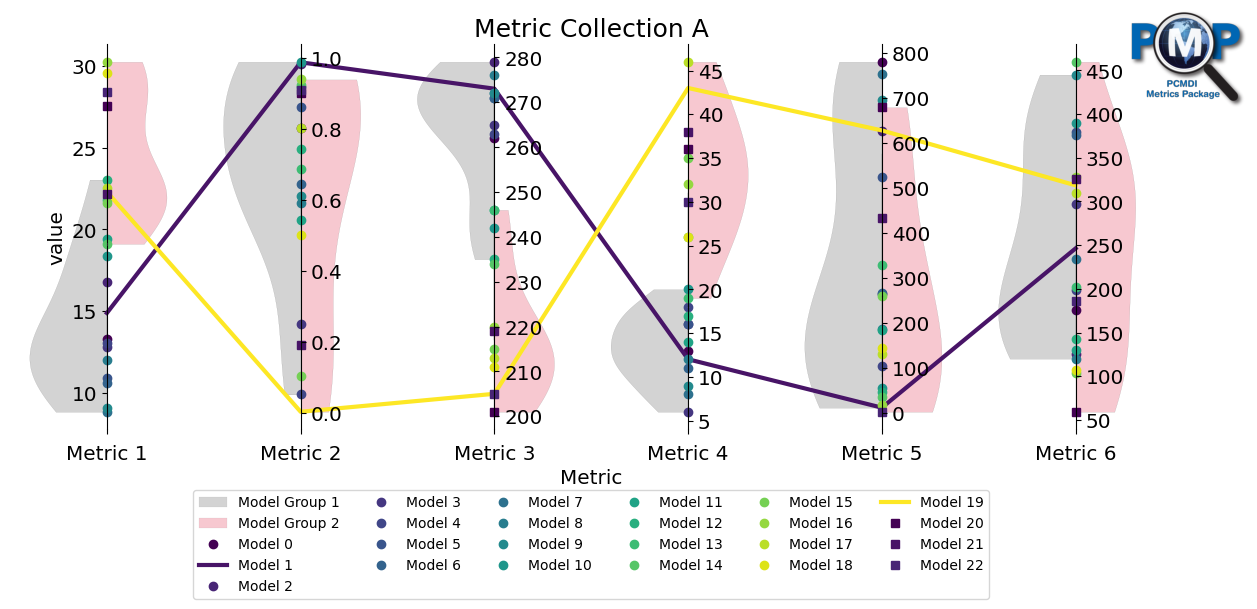

In [14]:
parallel_coordinate_plot(data, metric_names, model_names,
                         models_to_highlight=models_to_highlight,
                         model_names2=model_names2, 
                         group1_name='Model Group 1',
                         group2_name='Model Group 2',
                         title='Metric Collection A', 
                         show_violin=True,
                         violin_colors=('lightgrey', 'pink')
                        )

Models in the second group: ['Model 13', 'Model 14', 'Model 15', 'Model 16', 'Model 17', 'Model 18', 'Model 19', 'Model 20', 'Model 21', 'Model 22']


(<Figure size 1500x500 with 7 Axes>,
 <Axes: title={'center': 'Metric Collection A'}>)

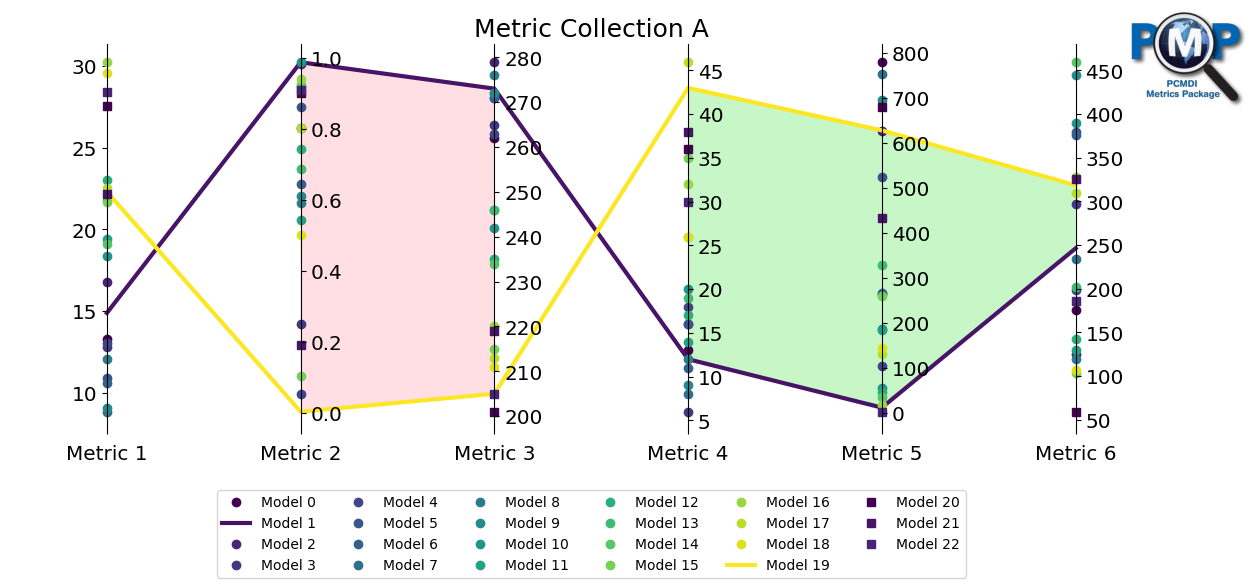

In [15]:
parallel_coordinate_plot(data, metric_names, model_names,
                         models_to_highlight=models_to_highlight,
                         model_names2=model_names2, 
                         group1_name='Model Group 1',
                         group2_name='Model Group 2',
                         show_violin=False,
                         title='Metric Collection A', 
                         comparing_models=models_to_highlight,
                         fill_between_lines=True,
                         fill_between_lines_colors=('lightgreen', 'pink')
                        )